##  Discrete Morse Theory

In [1]:
# load package from Morse_Theory
!sage --preparse Morse_Theory/Regular.sage
!mv Morse_Theory/Regular.sage.py Morse_Theory/Regular.py
!sage --preparse Morse_Theory/Flow.sage
!mv Morse_Theory/Flow.sage.py Morse_Theory/Flow.py
!sage --preparse Morse_Theory/Strong.sage
!mv Morse_Theory/Strong.sage.py Morse_Theory/Strong.py

from Morse_Theory.Regular import *
from Morse_Theory.Flow import *
from Morse_Theory.Strong import *

In [2]:
#K = simplicial_complexes.PoincareHomologyThreeSphere()
#K = simplicial_complexes.RudinBall()
#K = simplicial_complexes.Sphere(2)
#K = simplicial_complexes.Torus()
#K = simplicial_complexes.KleinBottle()
#K = simplicial_complexes.K3Surface()
K = simplicial_complexes.DunceHat()
X = K.face_poset()
#X.show()

In [3]:
len(X)

49

In [4]:
X_red, critical_cells, matching = regular_Morse_reduction(X)

No regular pair found, removing critical cell: (6, 7, 8)
candidate pair ((6, 8), (4, 6, 8))
((6, 8), (4, 6, 8)) regular
candidate pair ((4, 6), (4, 5, 6))
((4, 6), (4, 5, 6)) regular
candidate pair ((6, 7), (3, 6, 7))
((6, 7), (3, 6, 7)) regular
candidate pair ((4, 8), (3, 4, 8))
Non-contractible P[(3,), (6, 7, 8)] after update.
candidate pair ((4, 5), (2, 4, 5))
((4, 5), (2, 4, 5)) regular
candidate pair ((4, 8), (3, 4, 8))
Non-contractible P[(3,), (6, 7, 8)] after update.
candidate pair ((2, 5), (2, 3, 5))
Non-contractible P[(3,), (6, 7, 8)] after update.
candidate pair ((3, 7), (2, 3, 7))
Non-contractible P[(2,), (6, 7, 8)] after update.
candidate pair ((2, 4), (1, 2, 4))
((2, 4), (1, 2, 4)) regular
candidate pair ((4, 8), (3, 4, 8))
Non-contractible P[(3,), (6, 7, 8)] after update.
candidate pair ((2, 5), (2, 3, 5))
Non-contractible P[(3,), (6, 7, 8)] after update.
candidate pair ((3, 7), (2, 3, 7))
Non-contractible P[(2,), (6, 7, 8)] after update.
candidate pair ((1, 4), (1, 3, 4)

Non-contractible P[(2,), (1, 2, 7)] after update.
No regular pair found, removing critical cell: (2, 7)
candidate pair ((2, 8), (1, 2, 8))
Non-contractible P[(1,), (3, 4, 8)] after update.
candidate pair ((1, 2), (1, 2, 8))
Non-contractible P[(8,), (6, 7, 8)] after update.
candidate pair ((1, 8), (1, 2, 8))
Non-contractible P[(2,), (1, 2, 7)] after update.
No regular pair found, removing critical cell: (7,)
candidate pair ((2, 8), (1, 2, 8))
Non-contractible P[(1,), (3, 4, 8)] after update.
candidate pair ((1, 2), (1, 2, 8))
Non-contractible P[(8,), (6, 7, 8)] after update.
candidate pair ((1, 8), (1, 2, 8))
Non-contractible P[(2,), (1, 2, 7)] after update.
No regular pair found, removing critical cell: (1, 2, 8)
No regular pair found, removing critical cell: (2, 8)
candidate pair ((2,), (1, 2))
Non-contractible P[(1,), (3, 4, 8)] after update.
candidate pair ((8,), (1, 8))
Non-contractible P[(1,), (6, 7, 8)] after update.
No regular pair found, removing critical cell: (1, 2)
candidate

In [5]:
core = Morse_core(X, critical_cells, matching)

In [6]:
len(core)

23

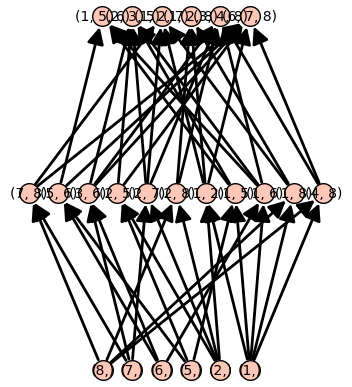

In [7]:
core.show()

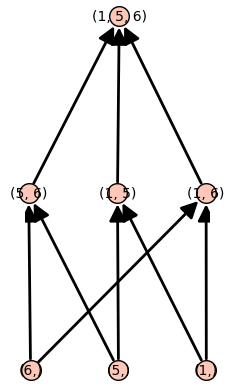

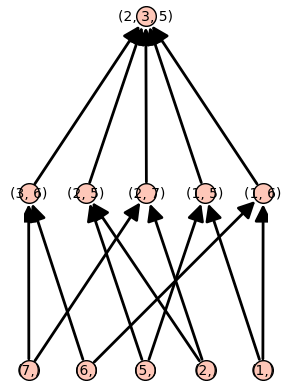

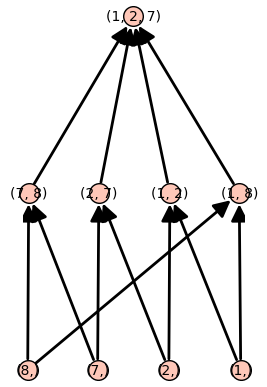

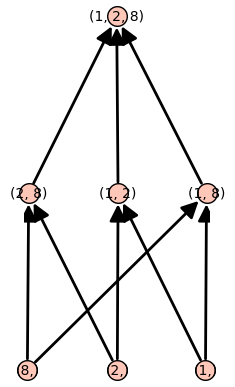

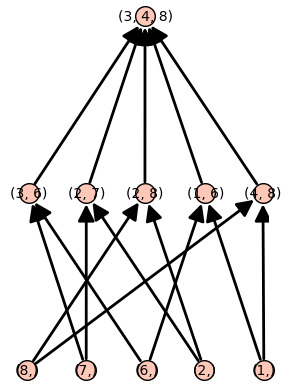

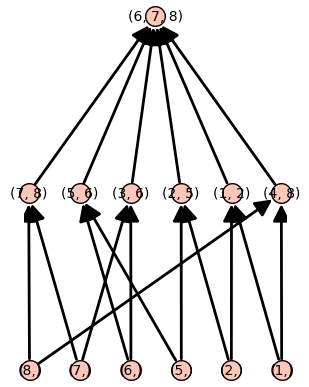

In [8]:
for x in core.maximal_elements():
    core.subposet(core.order_ideal([x])).show()

In [9]:
core.order_complex().homology()

{0: 0, 1: 0, 2: 0}

In [10]:
core.order_complex().fundamental_group()

Finitely presented group <  |  >

In [11]:
K.fundamental_group()

Finitely presented group <  |  >